#Cover Page

**Developed by:**

**Mina Tawadros - 41810291**


# Import the dataset from drive

In [57]:
!gdown --id 1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8

Downloading...
From: https://drive.google.com/uc?id=1eBuFpD7VAbUCGwxfG5J70G3r2_Bkhqu8
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 37.8MB/s]


#Importing libraries

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

# show how the data looks like

In [59]:
data = pd.read_csv('winequality-white.csv',sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [60]:
data['quality label'] = data['quality'].apply(lambda x: 1 if x<=5 else 2 if x<=7 else 3)
print(data[['quality','quality label']].value_counts().sort_index())
data.head()

quality  quality label
3        1                  20
4        1                 163
5        1                1457
6        2                2198
7        2                 880
8        3                 175
9        3                   5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


In [61]:
from scipy import stats
z = np.abs(stats.zscore(data))

data = data[(z < 3).all(axis=1)]

#Start Split the data and train

In [62]:
X = data.drop('quality',axis=1)
y = data['quality']

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=44, stratify=data['quality label'])

**Using Decision tree for trainning**

#using gini

In [63]:
DT_gini = DecisionTreeClassifier(criterion = "gini", random_state = 43,max_depth=3, min_samples_leaf=5)
DT_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=43)

In [64]:
y_pred_1 = DT_gini.predict(X_test)
cm_1 = confusion_matrix(y_test, y_pred_1)

Text(33.0, 0.5, 'Truth')

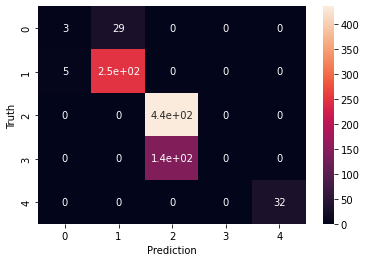

In [65]:
sns.heatmap(cm_1, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Acuuracy**

In [66]:
var="%"
print("Accuracy: %0.1f" % (accuracy_score(y_test,y_pred_1)*100), var[0])

Accuracy: 80.3 %


**classification repor**

In [67]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           4       0.38      0.09      0.15        32
           5       0.90      0.98      0.94       255
           6       0.75      1.00      0.86       436
           7       0.00      0.00      0.00       143
           8       1.00      1.00      1.00        32

    accuracy                           0.80       898
   macro avg       0.60      0.61      0.59       898
weighted avg       0.67      0.80      0.72       898



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# using entropy

In [68]:
DT_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0, max_depth = 3, min_samples_leaf = 5)
DT_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=0)

In [69]:
y_pred_2 = DT_entropy.predict(X_test)
cm_2 = confusion_matrix(y_test, y_pred_2)

Text(33.0, 0.5, 'Truth')

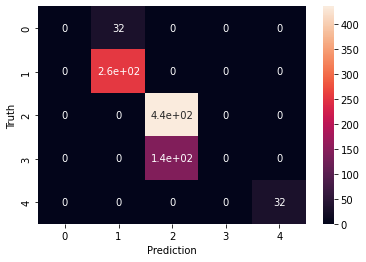

In [70]:
sns.heatmap(cm_2, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Acuuracy**

In [71]:
var="%"
print("Accuracy: %0.1f" % (accuracy_score(y_test,y_pred_2)*100), var[0])

Accuracy: 80.5 %


**classification repor**

In [72]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        32
           5       0.89      1.00      0.94       255
           6       0.75      1.00      0.86       436
           7       0.00      0.00      0.00       143
           8       1.00      1.00      1.00        32

    accuracy                           0.81       898
   macro avg       0.53      0.60      0.56       898
weighted avg       0.65      0.81      0.72       898



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
